# 무임승차 이용 대상 비율

In [17]:
# 서울시 지하철 호선별 역별 유_무임 승하차 인원 정보

import pandas as pd

# 1. CSV 파일 불러오기
# (파일 이름이 정확한지 확인해 주세요. 인코딩 문제로 오류 발생 시 encoding='cp949' 또는 encoding='euc-kr' 시도)
try:
    df = pd.read_csv('무임승차_대상별_현황_20251124151808.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv', encoding='cp949')
    except:
        print("파일 인코딩 오류: 파일 이름을 확인하거나 다른 인코딩(euc-kr 등)을 시도해 보세요.")
        # 오류 발생 시 더 이상 진행하지 않음
        exit()

# 2. 필요한 컬럼 추출 및 데이터 타입 변환
# 공공 데이터의 특성상 컬럼 이름이 한글로 되어있으므로, 정확한 컬럼명을 사용해야 합니다.
# (파일에 따라 컬럼명이 '유임승차', '무임승차', '유임승차인원' 등 다를 수 있습니다.)

# 가정되는 컬럼명 (사용자 파일의 컬럼명과 일치하는지 확인 필수)
COL_FREE = '무임승차인원'
COL_PAID = '유임승차인원'

# 데이터 타입을 숫자로 변환 (공백이나 쉼표가 있으면 오류가 발생할 수 있습니다. 필요시 데이터 전처리가 필요합니다.)
try:
    total_free = df[COL_FREE].sum()
    total_paid = df[COL_PAID].sum()
except KeyError:
    print(f"오류: 컬럼 이름 '{COL_FREE}' 또는 '{COL_PAID}'을 찾을 수 없습니다. 파일의 정확한 컬럼명을 확인해 주세요.")
    exit()
except TypeError:
    print("오류: 데이터에 숫자가 아닌 값이 포함되어 있습니다. 데이터프레임의 내용을 확인하고 전처리해야 합니다.")
    exit()

# 3. 무임승차 비율 계산
total_riders = total_free + total_paid

if total_riders == 0:
    free_ride_ratio = 0
else:
    # 무임승차 인원 / (유임승차 인원 + 무임승차 인원) * 100
    free_ride_ratio = (total_free / total_riders) * 100

# 4. 결과 출력
print("=========================================")
print("📊 서울 지하철 전체 무임승차 이용 대상 비율 분석 결과")
print("=========================================")
print(f"▶ 총 무임승차 인원: {total_free:,.0f} 명")
print(f"▶ 총 유임승차 인원: {total_paid:,.0f} 명")
print(f"▶ 총 승차 인원: {total_riders:,.0f} 명")
print("-----------------------------------------")
print(f"✅ 무임승차 이용 대상 비율: {free_ride_ratio:.2f} %")
print("=========================================")

📊 서울 지하철 전체 무임승차 이용 대상 비율 분석 결과
▶ 총 무임승차 인원: 4,499,593,928 명
▶ 총 유임승차 인원: 22,813,699,802 명
▶ 총 승차 인원: 27,313,293,730 명
-----------------------------------------
✅ 무임승차 이용 대상 비율: 16.47 %


✅ 서울 지하철 전체 무임승차 비율: 16.47 %


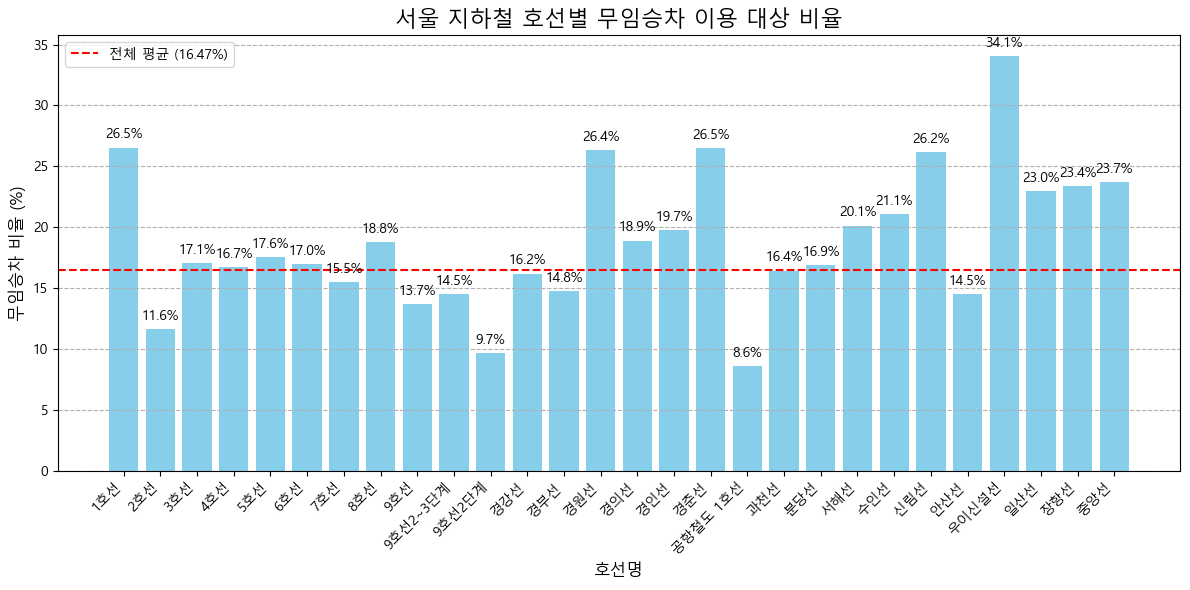

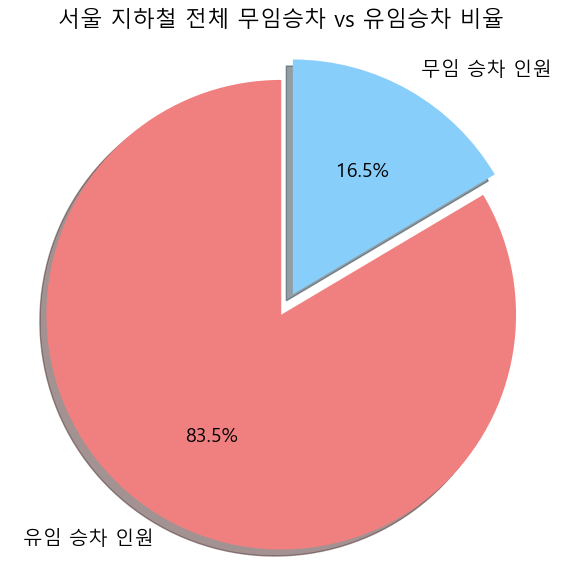

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Matplotlib 한글 폰트 설정 (OS에 맞는 폰트 경로를 사용하거나, 'NanumGothic' 설치 후 사용)
# Colab/Jupyter 환경:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# fm._rebuild()
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 기본 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. CSV 파일 불러오기
file_path = '서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv'

try:
    # 가장 흔한 인코딩 순서로 시도
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='cp949')
    except:
        print("--- 파일 인코딩 오류 ---")
        print("파일 이름을 확인하거나, 파일 인코딩 설정을 'euc-kr' 등으로 변경해보세요.")
        exit()

# 2. 필요한 컬럼 정의 및 숫자형 변환
# (컬럼명은 사용자 파일에 맞게 수정이 필요할 수 있습니다.)
COL_LINE = '호선명'
COL_FREE = '무임승차인원'
COL_PAID = '유임승차인원'

try:
    # 데이터 타입을 숫자로 변환 (오류 발생 시 0으로 처리하며 강제 변환)
    df[COL_FREE] = pd.to_numeric(df[COL_FREE], errors='coerce').fillna(0)
    df[COL_PAID] = pd.to_numeric(df[COL_PAID], errors='coerce').fillna(0)
except KeyError:
    print(f"--- 컬럼 이름 오류 ---")
    print(f"파일에 '{COL_FREE}' 또는 '{COL_PAID}' 컬럼이 없습니다. 정확한 컬럼명을 확인하세요.")
    exit()

# 3. 호선별 비율 계산

# a. 호선별 승차 인원 합계
line_data = df.groupby(COL_LINE).agg(
    total_free=(COL_FREE, 'sum'),
    total_paid=(COL_PAID, 'sum')
).reset_index()

# b. 비율 계산
line_data['total_riders'] = line_data['total_free'] + line_data['total_paid']
line_data['ratio'] = (line_data['total_free'] / line_data['total_riders']) * 100

# 4. 전체 평균 비율 계산 (시각화를 위해 추가)
overall_ratio = line_data['total_free'].sum() / line_data['total_riders'].sum() * 100
print(f"✅ 서울 지하철 전체 무임승차 비율: {overall_ratio:.2f} %")


# 5. 데이터 시각화
plt.figure(figsize=(12, 6))

# 막대 그래프 그리기
bars = plt.bar(line_data[COL_LINE], line_data['ratio'], color='skyblue')

# 전체 평균선 추가
plt.axhline(overall_ratio, color='r', linestyle='--', linewidth=1.5, label=f'전체 평균 ({overall_ratio:.2f}%)')

# 그래프 제목 및 라벨 설정
plt.title('서울 지하철 호선별 무임승차 이용 대상 비율', fontsize=16)
plt.xlabel('호선명', fontsize=12)
plt.ylabel('무임승차 비율 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--')

# 막대 위에 비율 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout() # 그래프 요소가 잘리지 않도록 조정
plt.show()

# 6. 추가 시각화 (전체 파이 그래프)
plt.figure(figsize=(7, 7))
labels = ['유임 승차 인원', '무임 승차 인원']
sizes = [line_data['total_paid'].sum(), line_data['total_free'].sum()]
colors = ['lightcoral', 'lightskyblue']
explode = [0, 0.1] # 무임 승차 부분 강조

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('서울 지하철 전체 무임승차 vs 유임승차 비율', fontsize=16)
plt.axis('equal') # 원형 유지
plt.show()

In [ ]:
#위에 일단 폐기



📊 서울 지하철 무임승차 대상별 인원 추정 및 비율
▶ 총 무임승차 인원 합계: 4,499,593,928 명
▶ 전체 승차 대비 무임승차 비율: 16.47 %
-----------------------------------------
   - 노인 (65세 이상): 3,824,654,839 명 (85.0%)
   - 장애인: 629,943,150 명 (14.0%)
   - 국가유공자 등: 44,995,939 명 (1.0%)


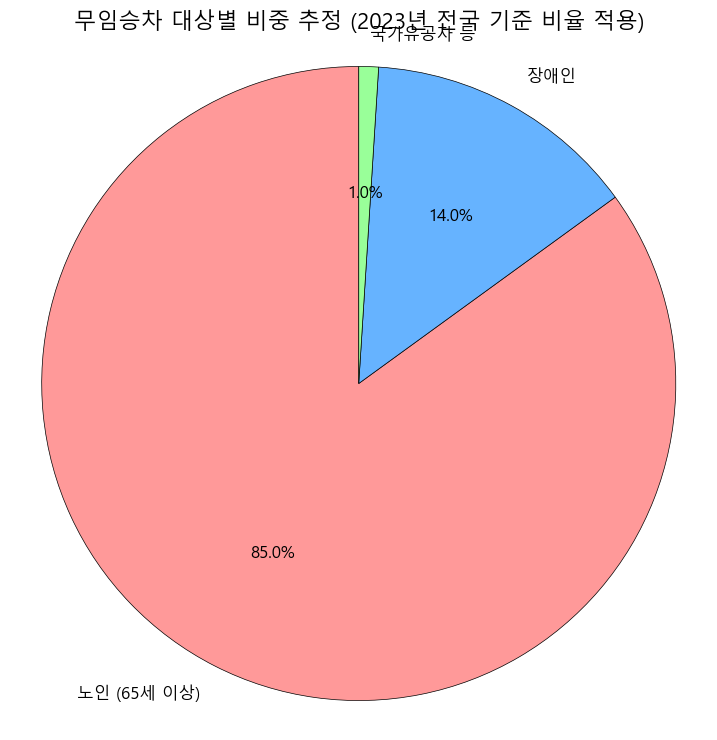

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib 한글 폰트 설정 (Windows 기본 폰트)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. CSV 파일 불러오기
file_path = '서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv'

try:
    df = pd.read_csv(file_path, encoding='cp949')
except Exception as e:
    print(f"--- 파일 로드 오류 ---")
    print(f"오류 내용: {e}")
    print("인코딩('utf-8', 'euc-kr' 등) 또는 파일명을 확인해주세요.")
    exit()

# 2. 컬럼 정의 및 데이터 합산
COL_FREE = '무임승차인원'
COL_PAID = '유임승차인원'

try:
    # 데이터 타입을 숫자로 변환 (오류 시 0으로 처리)
    df[COL_FREE] = pd.to_numeric(df[COL_FREE], errors='coerce').fillna(0)
    df[COL_PAID] = pd.to_numeric(df[COL_PAID], errors='coerce').fillna(0)
    
    # 전체 무임승차 인원 합계 계산
    total_free_riders = df[COL_FREE].sum()
    total_riders = total_free_riders + df[COL_PAID].sum()

except KeyError:
    print(f"--- 컬럼 이름 오류 ---")
    print(f"파일에 '{COL_FREE}' 또는 '{COL_PAID}' 컬럼이 없습니다. 정확한 컬럼명을 확인하세요.")
    exit()


# 3. 무임승차 대상별 비율 가정 및 인원 배분
# (이 비율은 2023년 전국 도시철도 통계를 바탕으로 가정한 값입니다.)
ratios = {
    '노인 (65세 이상)': 0.85,  # 85%
    '장애인': 0.14,           # 14%
    '국가유공자 등': 0.01      # 1%
}

# 인원 계산
categorized_riders = {
    category: total_free_riders * ratio 
    for category, ratio in ratios.items()
}

# 4. 결과 출력
print("=========================================")
print("📊 서울 지하철 무임승차 대상별 인원 추정 및 비율")
print("=========================================")
print(f"▶ 총 무임승차 인원 합계: {total_free_riders:,.0f} 명")
print(f"▶ 전체 승차 대비 무임승차 비율: {(total_free_riders / total_riders) * 100:.2f} %")
print("-----------------------------------------")
for category, count in categorized_riders.items():
    print(f"   - {category}: {count:,.0f} 명 ({ratios[category]*100:.1f}%)")
print("=========================================")


# 5. 파이 그래프 시각화
labels = list(categorized_riders.keys())
sizes = list(categorized_riders.values())
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
        textprops={'fontsize': 12})

plt.title('무임승차 대상별 비중 추정 (2023년 전국 기준 비율 적용)', fontsize=16)
plt.axis('equal') # 원형 유지
plt.show()

In [21]:
import pandas as pd
import numpy as np

# 1. CSV 파일 불러오기
file_path = '서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv'

try:
    # 가장 흔한 인코딩 순서로 시도 (cp949는 한국어 환경에서 흔함)
    df = pd.read_csv(file_path, encoding='cp949')
except Exception as e:
    print(f"--- 파일 로드 오류 ---")
    print(f"오류 내용: {e}")
    print("인코딩('utf-8', 'euc-kr' 등) 또는 파일명을 확인해주세요.")
    exit()

# 2. 컬럼 정의 및 데이터 합산
COL_FREE = '무임승차인원'
COL_PAID = '유임승차인원'

try:
    # 데이터 타입을 숫자로 변환 (오류 시 0으로 처리하며 강제 변환)
    df[COL_FREE] = pd.to_numeric(df[COL_FREE], errors='coerce').fillna(0)
    df[COL_PAID] = pd.to_numeric(df[COL_PAID], errors='coerce').fillna(0)
    
    # 전체 인원 합계 계산
    total_free_riders = df[COL_FREE].sum()
    total_paid_riders = df[COL_PAID].sum()
    total_riders = total_free_riders + total_paid_riders

except KeyError:
    print(f"--- 컬럼 이름 오류 ---")
    print(f"파일에 '{COL_FREE}' 또는 '{COL_PAID}' 컬럼이 없습니다. 정확한 컬럼명을 확인하세요.")
    exit()


# 3. 무임승차 대상별 비율 가정 및 인원 배분
# (2023년 전국 도시철도 통계를 바탕으로 가정)
ratios = {
    '노인 (65세 이상)': 0.85,
    '장애인': 0.14,
    '국가유공자 등': 0.01
}

# 인원 계산
categorized_riders = {
    category: total_free_riders * ratio 
    for category, ratio in ratios.items()
}

# 4. 데이터프레임 생성 및 테이블 정리
data = {
    '구분': ['총 승차 인원', '유임 승차 인원', '총 무임 승차 인원', '노인 (65세 이상)', '장애인', '국가유공자 등'],
    '인원 (명)': [
        total_riders,
        total_paid_riders,
        total_free_riders,
        categorized_riders['노인 (65세 이상)'],
        categorized_riders['장애인'],
        categorized_riders['국가유공자 등']
    ]
}

result_df = pd.DataFrame(data)

# '무임 승차 내 비율 (%)' 컬럼 추가
def calculate_inner_ratio(row):
    if row['구분'] == '총 무임 승차 인원':
        return 100.0
    elif row['구분'] in ratios:
        return ratios[row['구분']] * 100
    return np.nan

result_df['무임 승차 내 비율 (%)'] = result_df.apply(calculate_inner_ratio, axis=1)

# '전체 승차 대비 비율 (%)' 컬럼 추가
result_df['전체 승차 대비 비율 (%)'] = (result_df['인원 (명)'] / total_riders) * 100

# 인원수 포맷팅 및 비율 소수점 설정
result_df['인원 (명)'] = result_df['인원 (명)'].apply(lambda x: f'{x:,.0f}')
result_df['무임 승차 내 비율 (%)'] = result_df['무임 승차 내 비율 (%)'].apply(lambda x: f'{x:.1f}' if pd.notna(x) else '')
result_df['전체 승차 대비 비율 (%)'] = result_df['전체 승차 대비 비율 (%)'].apply(lambda x: f'{x:.2f}')


# 5. 테이블 출력
print("\n=======================================================")
print("📊 서울 지하철 무임승차 대상별 인원 및 비율 추정 결과 테이블")
print("=======================================================")
# 최종 결과를 Markdown 형식으로 출력
print(result_df.to_markdown(index=False))
print("=======================================================")
print("👉 노인, 장애인, 국가유공자 비율은 2023년 전국 도시철도 통계(85:14:1)를 적용하여 추정한 값입니다.")


📊 서울 지하철 무임승차 대상별 인원 및 비율 추정 결과 테이블
| 구분              | 인원 (명)      | 무임 승차 내 비율 (%)   |   전체 승차 대비 비율 (%) |
|:------------------|:---------------|:------------------------|--------------------------:|
| 총 승차 인원      | 27,313,293,730 |                         |                    100    |
| 유임 승차 인원    | 22,813,699,802 |                         |                     83.53 |
| 총 무임 승차 인원 | 4,499,593,928  | 100.0                   |                     16.47 |
| 노인 (65세 이상)  | 3,824,654,839  | 85.0                    |                     14    |
| 장애인            | 629,943,150    | 14.0                    |                      2.31 |
| 국가유공자 등     | 44,995,939     | 1.0                     |                      0.16 |
👉 노인, 장애인, 국가유공자 비율은 2023년 전국 도시철도 통계(85:14:1)를 적용하여 추정한 값입니다.


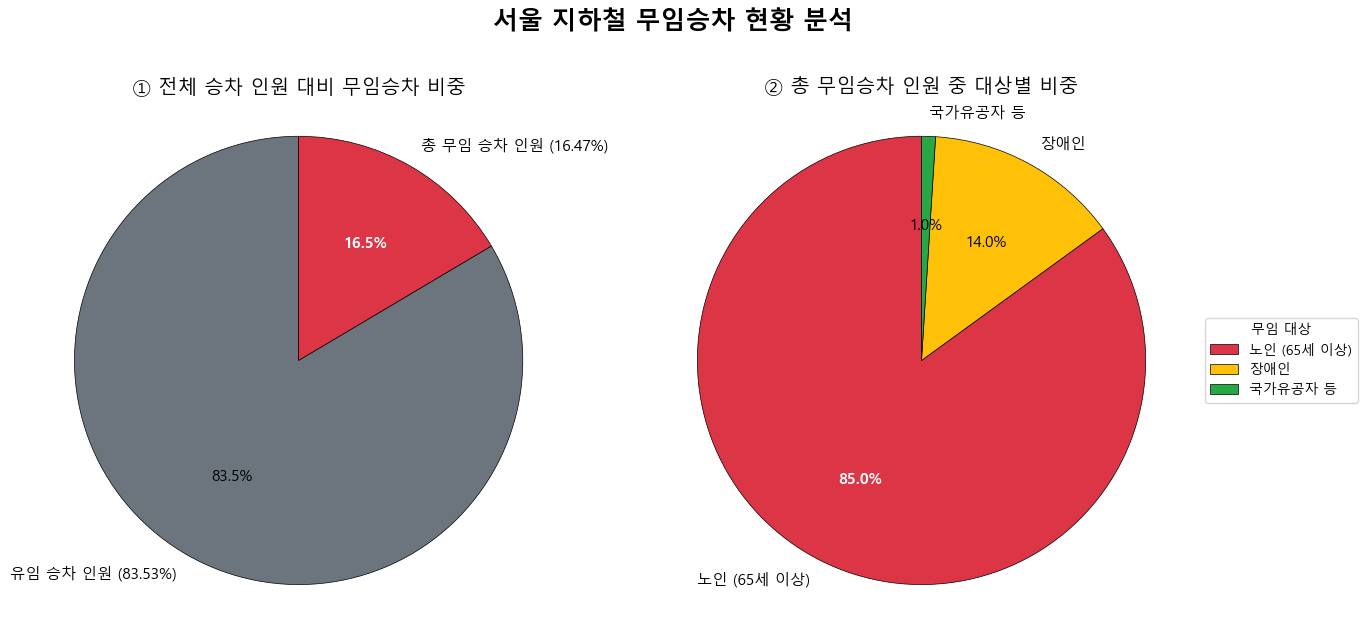

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# ============================================================
# 1. 데이터 준비
# ============================================================
data = {
    '구분': ['유임 승차 인원', '총 무임 승차 인원'],
    '인원': [22813699802, 4499593928],
    '색상': ['#6c757d', '#dc3545'] # 회색 (유임), 빨간색 (무임)
}
df_total = pd.DataFrame(data)

data_free = {
    '구분': ['노인 (65세 이상)', '장애인', '국가유공자 등'],
    '비율': [85.0, 14.0, 1.0],
    '색상': ['#dc3545', '#ffc107', '#28a745'] # 빨강(노인), 주황(장애인), 초록(유공자)
}
df_free = pd.DataFrame(data_free)

# ============================================================
# 2. 시각화 (서브플롯 2개)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('서울 지하철 무임승차 현황 분석', fontsize=18, fontweight='bold', y=1.02)

### 📌 그래프 1: 전체 승차 대비 무임승차 비중 ###
labels_1 = df_total['구분'] + ' (' + (df_total['인원'] / df_total['인원'].sum() * 100).round(2).astype(str) + '%)'
wedges_1, texts_1, autotexts_1 = axes[0].pie(
    df_total['인원'], 
    labels=labels_1, 
    colors=df_total['색상'],
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 11, 'color': 'black'}
)
axes[0].set_title('① 전체 승차 인원 대비 무임승차 비중', fontsize=14, pad=15)
axes[0].axis('equal') # 원형으로 보이도록 설정

# **무임 승차 인원(16.5%) 강조**
autotexts_1[1].set_color('white')
autotexts_1[1].set_fontweight('bold')


### 📌 그래프 2: 총 무임승차 인원 중 대상별 비중 ###
labels_2 = df_free['구분']
wedges_2, texts_2, autotexts_2 = axes[1].pie(
    df_free['비율'], 
    labels=labels_2, 
    colors=df_free['색상'],
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 11, 'color': 'black'}
)
axes[1].set_title('② 총 무임승차 인원 중 대상별 비중', fontsize=14, pad=15)
axes[1].axis('equal') 

# **노인 비중(85.0%) 강조**
autotexts_2[0].set_color('white')
autotexts_2[0].set_fontweight('bold')

# 범례 추가 (그래프 2의 범례를 오른쪽 외부에 배치)
axes[1].legend(wedges_2, labels_2, title="무임 대상", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()